<a href="https://colab.research.google.com/github/GastonFortuna/Energia_renovable/blob/main/Gaston_Fortuna_energia_renovable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Description:  
This dataset contains detailed information about various renewable energy systems, including installed capacity, energy production, consumption, storage, investment, and environmental impact. The goal is to provide a comprehensive view of renewable energy, useful for research and analysis in the field of sustainable energy.

## Variables:  
1. Type_of_Renewable_Energy: Numerical code representing the type of renewable energy source (1: Solar, 2: Wind, 3: Hydroelectric, 4: Geothermal, 5: Biomass, 6: Tidal, 7: Wave).
2. Installed_Capacity_MW: Installed capacity in megawatts (MW).
3. Energy_Production_MWh: Yearly energy production in megawatt-hours (MWh).
4. Energy_Consumption_MWh: Yearly energy consumption in megawatt-hours (MWh).
5. Energy_Storage_Capacity_MWh: Energy storage capacity in megawatt-hours (MWh).
6. Storage_Efficiency_Percentage: Efficiency of energy storage systems in percentage.
7. Grid_Integration_Level: Numerical code representing the level of grid integration (1: Fully Integrated, 2: Partially Integrated, 3: Minimal Integration, 4: Isolated Microgrid).
8. Initial_Investment_USD: Initial investment costs in USD.
9. Funding_Sources: Numerical code representing the funding source (1: Government, 2: Private, 3: Public-Private Partnership).
10. Financial_Incentives_USD: Financial incentives in USD.
11. GHG_Emission_Reduction_tCO2e: Reduction in greenhouse gas emissions in tons of CO2 equivalent (tCO2e).
12. Air_Pollution_Reduction_Index: Air pollution reduction index.
13. Jobs_Created: Number of jobs created.  
## Objetivo:  
- Metodo de energia renovable con relacion costo-beneficio mas elevada
- Encontrar la metodologia mas eficiente
- Encontrar la metodologia con menor inversion, mayor eficiencia y mayor cantidad de empleos.

# Desarrollo

In [ ]:
# Dependencias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#Sacamos la limitacion del 'truncado' al momento de visualizar los 'dataframes' para poder ver todas las columnas.
pd.options.display.max_columns = None

In [ ]:
# Cargamos el DS
url = "https://raw.githubusercontent.com/GastonFortuna/Energia_renovable/main/energy_dataset.csv"
ds = pd.read_csv(url)

# Creamos una copia para poder rescatar la version original en caso de problemas
df = ds.copy()
df.head()

,Type_of_Renewable_Energy,Installed_Capacity_MW,Energy_Production_MWh,Energy_Consumption_MWh,Energy_Storage_Capacity_MWh,Storage_Efficiency_Percentage,Grid_Integration_Level,Initial_Investment_USD,Funding_Sources,Financial_Incentives_USD,GHG_Emission_Reduction_tCO2e,Air_Pollution_Reduction_Index,Jobs_Created
0,4,93.423205,103853.2206,248708.4892,2953.248771,89.887562,4,4.732248e+08,1,9.207772e+06,6663.816572,81.742461,1366
1,4,590.468942,190223.0649,166104.1642,5305.174042,84.403343,4,1.670697e+08,2,1.685101e+06,30656.049820,78.139042,1743
2,1,625.951142,266023.4824,424114.6308,2620.192622,60.498249,2,8.463610e+07,2,5.111813e+06,1749.613759,8.461296,363
3,1,779.998728,487039.5296,308337.7316,1925.250307,86.897861,3,3.967690e+08,2,4.805902e+06,43233.237820,8.402441,2821
4,3,242.106837,482815.0856,360437.7705,3948.945383,70.949351,2,3.574413e+07,1,1.668601e+07,14858.662760,28.822867,2583


In [ ]:
# Muestra el shape del dataset
print('Este data set tiene ' + str(df.shape[0]) + ' filas, y ' + str(df.shape[1]) + ' columnas')

Este data set tiene 15000 filas, y 13 columnas


In [ ]:
# Hacemos un paneo general
df.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
Type_of_Renewable_Energy,15000.0,4.0,2.0,1.0,2.0,4.0,6.0,7.0
Installed_Capacity_MW,15000.0,495.9,288.2,1.1,245.5,492.9,742.3,1000.0
Energy_Production_MWh,15000.0,252351.0,144062.9,1030.1,128568.9,253216.9,377083.8,499991.2
Energy_Consumption_MWh,15000.0,225981.9,129223.7,584.0,115587.4,225226.4,338656.2,449922.7
Energy_Storage_Capacity_MWh,15000.0,5030.2,2894.1,2.2,2543.3,5054.0,7536.9,9999.1
Storage_Efficiency_Percentage,15000.0,75.2,14.5,50.0,62.7,75.3,87.8,100.0
Grid_Integration_Level,15000.0,2.5,1.1,1.0,1.0,3.0,4.0,4.0
Initial_Investment_USD,15000.0,251484914.8,143284272.0,1008107.1,125970932.6,253990954.4,375913042.2,499940711.6
Funding_Sources,15000.0,2.0,0.8,1.0,1.0,2.0,3.0,3.0
Financial_Incentives_USD,15000.0,10029766.3,5787302.6,51558.4,4963453.9,10024143.5,15074166.9,19998553.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Type_of_Renewable_Energy       15000 non-null  int64  
 1   Installed_Capacity_MW          15000 non-null  float64
 2   Energy_Production_MWh          15000 non-null  float64
 3   Energy_Consumption_MWh         15000 non-null  float64
 4   Energy_Storage_Capacity_MWh    15000 non-null  float64
 5   Storage_Efficiency_Percentage  15000 non-null  float64
 6   Grid_Integration_Level         15000 non-null  int64  
 7   Initial_Investment_USD         15000 non-null  float64
 8   Funding_Sources                15000 non-null  int64  
 9   Financial_Incentives_USD       15000 non-null  float64
 10  GHG_Emission_Reduction_tCO2e   15000 non-null  float64
 11  Air_Pollution_Reduction_Index  15000 non-null  float64
 12  Jobs_Created                   15000 non-null 

In [ ]:
# En principio se puede ver que no tenemos valores nuloes, y que son todos tipo FLOAT o INT.
# Sin embargo vamos a relizar un control de nuloes y de valores repetidos

df.isnull().sum()

Type_of_Renewable_Energy         0
Installed_Capacity_MW            0
Energy_Production_MWh            0
Energy_Consumption_MWh           0
Energy_Storage_Capacity_MWh      0
Storage_Efficiency_Percentage    0
Grid_Integration_Level           0
Initial_Investment_USD           0
Funding_Sources                  0
Financial_Incentives_USD         0
GHG_Emission_Reduction_tCO2e     0
Air_Pollution_Reduction_Index    0
Jobs_Created                     0
dtype: int64

In [ ]:
# Volvemos a ver que no tenemos valores nulos
# Vamos a revisar los duplicados
df.duplicated().sum()

0

In [ ]:
# Se observa que tampoco tenemos valores duplicados
# Podemos decir que nos encontramos con un DataSets muy limpio en cuanto a posibles falsos valores.

df.columns

Index(['Type_of_Renewable_Energy', 'Installed_Capacity_MW',
       'Energy_Production_MWh', 'Energy_Consumption_MWh',
       'Energy_Storage_Capacity_MWh', 'Storage_Efficiency_Percentage',
       'Grid_Integration_Level', 'Initial_Investment_USD', 'Funding_Sources',
       'Financial_Incentives_USD', 'GHG_Emission_Reduction_tCO2e',
       'Air_Pollution_Reduction_Index', 'Jobs_Created'],
      dtype='object')

In [ ]:
# A su vez, podemos confirmar que la codificacion del encabezado de cada columna es entendible
# Se concluye que no es necesario hacer grandes modificacion en el DataSet

In [ ]:
'''
Vamos a empezar a sacar algunos Insights, tenemos algunas columnas que estan codificadas como:
- Type_of_Renewable_Energy
  - 1: Solar
  - 2: Wind
  - 3: Hydroelectric
  - 4: Geothermal
  - 5: Biomass
  - 6: Tidal
  - 7: Wave
- Grid_Integration_Level
  - 1: Fully Integrated
  - 2: Partially Integrated
  - 3: Minimal Integration
  - 4: Isolated Microgrid
- Funding_Sources
  - 1: Government
  - 2: Private
  - 3: Public-Private Partnership
'''

# Vamos a ver como esta distribuido
df['Type_of_Renewable_Energy'].value_counts()

Type_of_Renewable_Energy
2    2202
1    2169
3    2157
5    2150
6    2124
4    2105
7    2093
Name: count, dtype: int64

In [ ]:
df['Grid_Integration_Level'].value_counts()

Grid_Integration_Level
1    3802
4    3786
3    3749
2    3663
Name: count, dtype: int64

In [ ]:
df['Funding_Sources'].value_counts()

Funding_Sources
3    5042
1    4982
2    4976
Name: count, dtype: int64

In [ ]:
# Podemos ver que las "caracteristicas" arriba detalladas tienen bastante homogeneidad en cuanto a su distribucion en cantidades.

In [ ]:
# Vamos a avanzar mostrando la matriz de corrleacion con un mapa de calor.

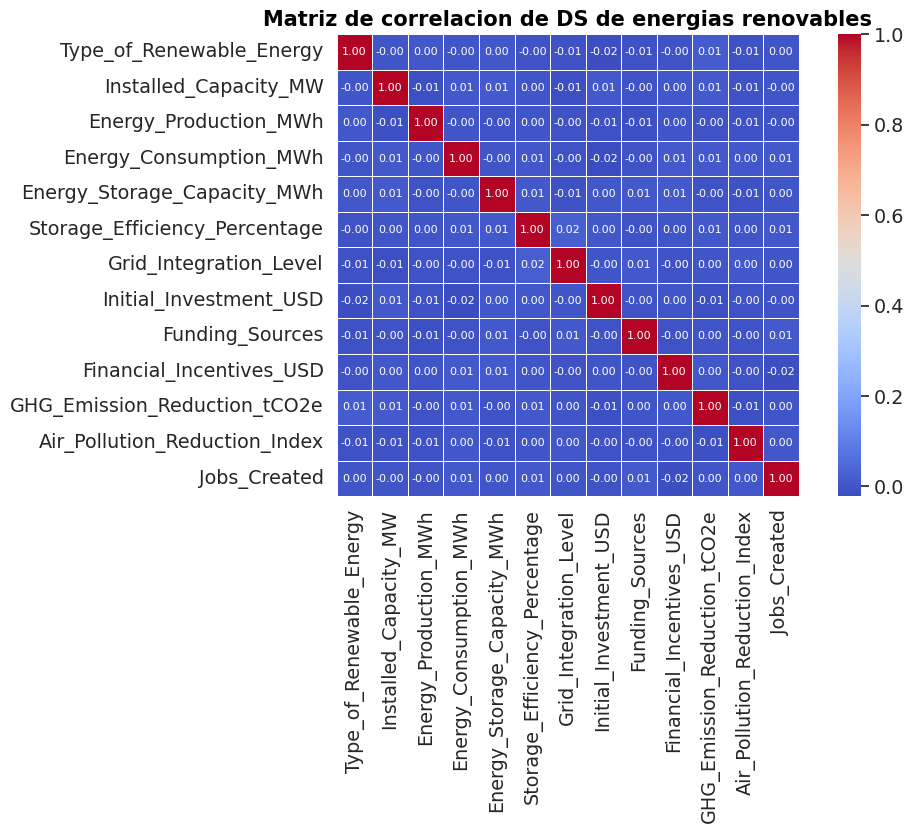

In [ ]:
# Calculamos la Matriz de Correlacion
corr_mat = np.corrcoef(df.T)

# Definimos el lienzo para el grafico
fig, ax =plt.subplots(figsize=(10,6))

#Definimos el tamaño de la letra para seaborn
sns.set(font_scale=1.25)

#Creamos el heatmap pasandole los parameotros, y asignandolo al ax del subplot
'''
  data: matriz de correalcion,
  xticklabels: seteamos los labels en el eje X,
  yticklabels: seteamos los labels en el eje y,
  cmap: mapa de color,
  annot: activamos las anotaciones,
  fmt: formato de los porcentajes
'''
sns.heatmap(
    ax=ax,
    data=corr_mat, xticklabels=df.T.index, yticklabels=df.T.index, cmap='coolwarm', annot=True, fmt='.2f',
    cbar=True,
    square=True,
    annot_kws={'size': 8},
    linewidth=.5,
)

#Le damos formato al 'titulo'
plt.title(f'Matriz de correlacion de DS de energias renovables',
          fontdict={
              'fontsize': 15,
              'fontweight': 'bold',
              'color': 'black'
              })

'''
#Si se quieren tener el eje X en la parte superior

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
plt.xticks(rotation=90)
'''

# Muestra el gráfico
plt.show()

In [ ]:
# Podemos observar que no tenemos ningun 'atributo' que muestre cierta correlacion con otros 'atributos'.